Link Dataset : https://www.kaggle.com/datasets/vishweshsalodkar/wild-animals

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d vishweshsalodkar/wild-animals

  0% 0.00/7.37M [00:00<?, ?B/s]
100% 7.37M/7.37M [00:00<00:00, 78.9MB/s]


In [ ]:
!unzip wild-animals.zip -d animals_data

Archive:  wild-animals.zip
  inflating: animals_data/Animals/Cheetah/animal-africa-wilderness-zoo.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-1128798__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-171217__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-223734__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-2268955__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-2412554__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-3099722__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-322310__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-3475778__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-4096056__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-425468__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-448901__480.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-5689878__340.jpg  
  inflating: animals_data/Animals/Cheetah/cheetah-864747__340.jpg  
  inf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
path = path = '/content/animals_data/Animals'

In [ ]:
import os

In [ ]:
kategori = os.listdir(path)
kategori


['Lion', 'Leopard', 'Cheetah', 'Jaguar', 'Tiger']

# **Mengatur path dataset menjadi 3 train, val, test**

In [ ]:

train_dir = '/content/animals_data/Animals'
validation_dir = '/content/animals_data/Animals'
test_dir = '/content/animals_data/Animals'

## **Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## **Split dataset menjadi train, val, dan test**

Data train

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

Found 170 images belonging to 5 classes.


Data Val

In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

Found 170 images belonging to 5 classes.


Data Test

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

Found 170 images belonging to 5 classes.


## **Membuat model sequential**

In [ ]:
model = Sequential()

## **Menggunakan pre-trained model VGG16**

In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


## **Menggunakan optimizer, loss, dan metrics**

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## **Callbacks**

In [ ]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

## **Latih Model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
6/6 [==============================] - 61s 11s/step - loss: -54.6672 - accuracy: 0.1765 - val_loss: -76.7018 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 62s 12s/step - loss: -101.5593 - accuracy: 0.1765 - val_loss: -127.7507 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 63s 12s/step - loss: -151.1625 - accuracy: 0.1765 - val_loss: -189.3255 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 61s 11s/step - loss: -227.7521 - accuracy: 0.1765 - val_loss: -260.5072 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 62s 12s/step - loss: -299.6815 - accuracy: 0.1765 - val_loss: -343.8213 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 61s 11s/step - loss: -389.3076 - accuracy: 0.1765 - val_loss: -437.9420 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 40s 

# **Evaluasi model**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi data test: {test_accuracy:.2f}')

6/6 [==============================] - 21s 3s/step - loss: -20616.3027 - accuracy: 0.1765
Akurasi data test: 0.18


## **Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

## **Grafik Accuracy**

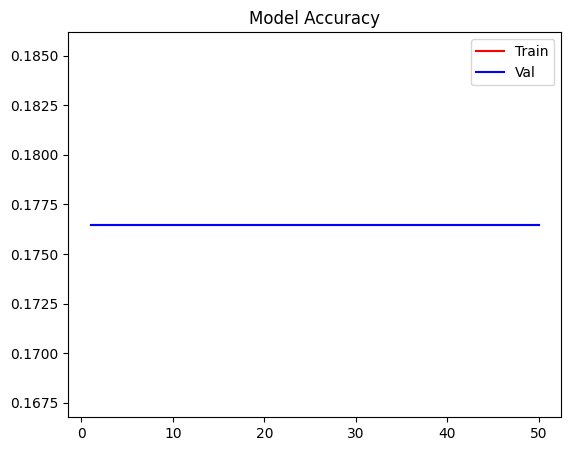

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

## **Grafik Loss**

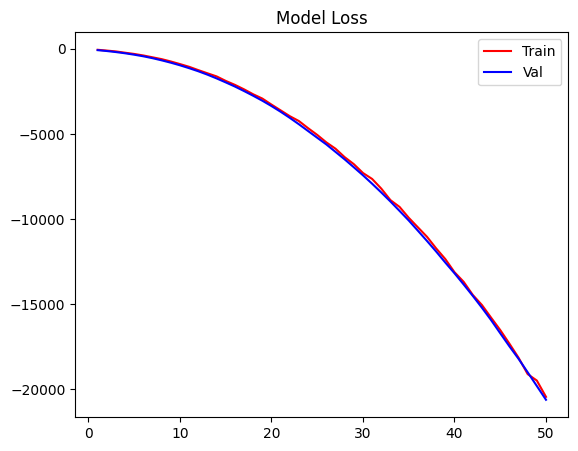

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()
